Este trabajo tiene la intencion de analizar y buscar tendencias/patrones en la deforestacion y restauracion de zonas de nuestro pais. 
Un trabajo en profundidad de este topico es funcional para conocer y concientizar sobre la explotacion que reciben los bosques nativos y para informar a las empresas de las maneras mas optimas de obtener puntos crediticios de co2, a modo de compensar su huella de carbono.

Iniciamos con el preprocesamiento de datos de emisiones de gases de efecto invernadero.
Para esto utilizaremos las siguientes librerias en python:

In [57]:
""""""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import seaborn as sns

sns.set_theme(style="darkgrid")

Luego de una exhaustiva busqueda de informacion, Inicialmente decidi por enfocar el proyecto en un a region de mi pais separadas por un limite natural.
Las zonas de mayor valor economico en terminos de reforestacion son:
- Gran Chaco
- Selva Paranaense
- Yunga
- Bosque Andino patagonico

Como el Gran Chaco cubria una zona muy amplia para analizar (Salta, Chacho, Formosa, Santaigo del estero) Decidi por buscar informacion de la Selva Paranaense.

La primera fuente oficial que encontre fue el segundo inventario nacional de bosque nativo. A pesar de ser una gran fuente de informacion contando con estadisticas y analisis no me fue posible acceder a los datos para trabajar con ellos directamente
Sin embargo pude encontrar algunos recursos que luego me fueron utiles como la plataforma MapBiomas.
Tambien encontre diferentes paginas que analizaban las emisiones de Co2 y la perdida forestal a nivel global como GLOBAL FOREST WATCH y TRACE pero como no separaban por zonas Finalmente el analisis sera hecho de misiones (que igualmente cubre la mayor parte de la selva Paranaense) 

Las fuentes oficiales de Global Forest Watch tienen sus mapas subidos a Google Earth. Descargando el mapa de argentina y cortandolo con un archivo shape de una fuente oficial de la figura de misiones, podemos ver e imprimir los mapas de perdida, ganancia y cobertura

In [58]:
# Cargar el shapefile de los límites de Misiones
"""misiones = gpd.read_file(c.PROVINCE_SHAPE_PATH)
misiones = misiones[misiones["nam"] == "Misiones"]

# Abrir el archivo GeoTIFF
with rasterio.open(c.ARGENTINA_TIFF_PATH) as src:
    terrain_image, terrain_transform = mask(src, misiones.geometry, crop=True)
    terrain_meta = src.meta.copy()

with rasterio.open(c.MISIONES_COVER_TIFF_PATH) as src:
    cover_image, cover_transform = mask(src, misiones.geometry, crop=True)
    cover_meta = src.meta.copy()

with rasterio.open(c.MISIONES_GAIN_TIFF_PATH) as src:
    gain_image, gain_transform = mask(src, misiones.geometry, crop=True)
    gain_meta = src.meta.copy()

with rasterio.open(c.MISIONES_LOSS_TIFF_PATH) as src:
    loss_image, loss_transform = mask(src, misiones.geometry, crop=True)
    loss_meta = src.meta.copy()
    
# Actualizar los metadatos
terrain_meta.update({
    "driver": "GTiff",
    "height": terrain_image.shape[1],
    "width": terrain_image.shape[2],
    "transform": terrain_transform
})

cover_meta.update({
    "driver": "GTiff",
    "height": cover_image.shape[1],
    "width": cover_image.shape[2],
    "transform": cover_transform
})

gain_meta.update({
    "driver": "GTiff",
    "height": gain_image.shape[1],
    "width": gain_image.shape[2],
    "transform": gain_transform
})

loss_meta.update({
    "driver": "GTiff",
    "height": loss_image.shape[1],
    "width": loss_image.shape[2],
    "transform": loss_transform
})


# Guardar el resultado
with rasterio.open("data/misiones_terrain.tif", "w", **cover_meta) as dest:
    dest.write(terrain_image)

with rasterio.open("data/misiones_cover.tif", "w", **cover_meta) as dest:
    dest.write(cover_image)

with rasterio.open("data/misiones_gain.tif", "w", **gain_meta) as dest:
    dest.write(gain_image)

with rasterio.open("data/misiones_loss.tif", "w", **loss_meta) as dest:
    dest.write(loss_image)
"""


'misiones = gpd.read_file(c.PROVINCE_SHAPE_PATH)\nmisiones = misiones[misiones["nam"] == "Misiones"]\n\n# Abrir el archivo GeoTIFF\nwith rasterio.open(c.ARGENTINA_TIFF_PATH) as src:\n    terrain_image, terrain_transform = mask(src, misiones.geometry, crop=True)\n    terrain_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_COVER_TIFF_PATH) as src:\n    cover_image, cover_transform = mask(src, misiones.geometry, crop=True)\n    cover_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_GAIN_TIFF_PATH) as src:\n    gain_image, gain_transform = mask(src, misiones.geometry, crop=True)\n    gain_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_LOSS_TIFF_PATH) as src:\n    loss_image, loss_transform = mask(src, misiones.geometry, crop=True)\n    loss_meta = src.meta.copy()\n    \n# Actualizar los metadatos\nterrain_meta.update({\n    "driver": "GTiff",\n    "height": terrain_image.shape[1],\n    "width": terrain_image.shape[2],\n    "transform": terrain_transform\n})\n\ncover

Notemos que la perdida y la ganancia a diferencia de la cobertura y el terreno solo contienen valores numericos de 0 (no se ha producido turbulencia forestal) y 1 (se ha producido una turbulencia forestal)

Luego de buscar la informacion de diferentes fuentes, comenzamos a unir los datos comparables

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import seaborn as sns
import pandas as pd

treecover_loss_ha = pd.read_csv(
    "../raw_data/gfw/treecover_loss__ha.csv", sep=","
)
treecover_loss_ha.rename(
    columns={
        "umd_tree_cover_loss__year": "year",
        "umd_tree_cover_loss__ha": "loss",
        "gfw_gross_emissions_co2e_all_gases__Mg": "co2 emissions",
    },
    inplace=True,
)
treecover_loss_ha.drop(["iso", "adm1"], axis=1)

# forest_loss_ha = pd.read_csv("../raw_data/gfw/forest_loss__ha.csv", sep=",")
# forest_loss_ha.rename(
#     columns={
#         "umd_tree_cover_loss__year": "year",
#         "umd_tree_cover_loss__ha": "forest loss",
#         "gfw_gross_emissions_co2e_all_gases__Mg": "forest emissions",
#     },
#     inplace=True,
# )
# forest_loss_ha.drop(["iso", "adm1"], axis=1)

misiones_forest_change_ha = pd.read_csv(
    "../raw_data/mapbiomas/misiones_forest_change.csv", sep=","
)
misiones_forest_change_ha.rename(
    columns={
        "pérdida": "total loss",
        "ganancia": "total gain",
        "año": "year",
    },
    inplace=True,
)
misiones_forest_change_ha = misiones_forest_change_ha[
    ["year", "total loss", "total gain"]
]

misiones_forest_change_ha

treecover_loss_by_fires_ha = pd.read_csv(
    "../raw_data/gfw/treecover_loss_from_fires_by_region__ha.csv", sep=","
)
treecover_loss_by_fires_ha.rename(
    columns={
        "umd_tree_cover_loss__year": "year",
        "umd_tree_cover_loss_from_fires__ha": "loss from fires",
    },
    inplace=True,
)
treecover_loss_by_fires_ha = treecover_loss_by_fires_ha[
    ["year", "loss from fires"]
]

mapbiomas = pd.read_csv(
    "../raw_data/mapbiomas/total_misiones_coverage.csv", sep=","
)
mapbiomas = mapbiomas.transpose()
mapbiomas.columns = mapbiomas.iloc[0]
mapbiomas = mapbiomas[1:]
mapbiomas.reset_index(inplace=True)
mapbiomas.columns.name = ""
mapbiomas.rename(columns={"index": "year"}, inplace=True)
mapbiomas["year"] = mapbiomas["year"].astype(int)
mapbiomas["total agriculture"] = (
    mapbiomas["pasture"]
    + mapbiomas["cultivation"]
    + mapbiomas["forest plantations"]
)
mapbiomas["total forest"] = (
    mapbiomas["natural woody"] + mapbiomas["natural non-woody"]
)

# misiones_forest_change_ha["year"] = misiones_forest_change_ha["year"] - 1
df = pd.merge(treecover_loss_ha, mapbiomas, on="year")
df = pd.merge(misiones_forest_change_ha, df, on="year")

df = df[
    [
        "year",
        "total agriculture",
        "cultivation",
        "forest plantations",
        "total forest",
        "natural woody",
        # "natural non-woody",
        "co2 emissions",
        "loss",
        # "forest loss",
        "total loss",
        "total gain",
    ]
]
df = pd.merge(df, treecover_loss_by_fires_ha)


df

,year,total agriculture,cultivation,forest plantations,total forest,natural woody,co2 emissions,loss,total loss,total gain,loss from fires
0,2001.0,284302.131443,24554.799167,202632.587232,1933311.308095,1782376.327891,8.051900e+06,18266.672224,33723.680145,27191.860512,431.288055
1,2002.0,283102.696828,20647.353069,203607.13532,1924256.373608,1782478.590803,8.073364e+06,17650.476917,24650.177787,24753.514765,642.563801
2,2003.0,292487.960583,22673.516337,208429.509433,1913214.777156,1774953.530379,1.056365e+07,22703.627223,33970.451582,26445.102060,912.609325
3,2004.0,297600.545205,25014.054015,212427.7698,1903095.331457,1771108.649445,1.387988e+07,28918.455786,39878.165420,36033.729602,1427.115767
4,2005.0,305579.09517,27078.859809,216802.352451,1886834.241074,1761418.311721,1.541631e+07,31673.990936,38474.190606,28781.091836,1256.450324
5,2006.0,313951.165756,29268.772732,222755.218827,1894160.489549,1770922.83917,1.693333e+07,34285.829766,31361.666249,40859.178952,1311.281586
6,2007.0,318477.922985,29068.725278,230040.376675,1881445.145553,1760068.118163,1.483566e+07,29295.100250,33877.438689,23021.217193,820.303438
7,2008.0,326686.53208,25263.063428,241600.340859,1851489.968586,1736060.913827,1.782577e+07,35041.658203,50471.122784,26460.279194,1535.030038
8,2009.0,329880.799413,19894.7461,249517.582014,1838350.017336,1732085.782242,1.042158e+07,19883.211709,31651.191182,27675.424362,1035.981438
9,2010.0,352431.047583,22203.347354,267417.87221,1833428.92144,1732064.487128,1.350111e+07,23990.758651,36832.775908,36809.046945,724.390121


## Preprocesamiento



De un primer vistazo podemos observar que las emisiones de co2 y las perdidas en miles de hectareas estan fuertemente relacionadas. Con un analisis de la fuerza de esta relacion utilizando el coeficiente de correlacion lineal dado por:

\begin{equation*}
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}
\end{equation*}

donde

\begin{align*}
S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) && | &&
S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2 && | &&
S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{align*}

In [60]:
def correlation_r(x, y):
    S_xy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    S_xx = np.sum((x - np.mean(x)) ** 2)
    S_yy = np.sum((y - np.mean(y)) ** 2)

    return S_xy / np.sqrt(S_xx * S_yy)

In [61]:
x = df["year"]
y = df["total agriculture"]

print(correlation_r(x, y))

0.9807354022739591


Notaremos algunas metricas a medir:

      total forest      net diff          gain    year
0   1933311.308095           NaN           NaN  2001.0
1   1924256.373608    102.262912  17752.739829  2002.0
2   1913214.777156  -7525.060424  15178.566799  2003.0
3   1903095.331457  -3844.880934  25073.574852  2004.0
4   1886834.241074  -9690.337724  21983.653212  2005.0
5   1894160.489549   9504.527449  43790.357215  2006.0
6   1881445.145553 -10854.721007  18440.379243  2007.0
7   1851489.968586 -24007.204336  11034.453867  2008.0
8   1838350.017336  -3975.131585  15908.080125  2009.0
9    1833428.92144    -21.295115  23969.463536  2010.0
10  1829576.046869  -1908.457163  20606.845011  2011.0
11   1814224.38785 -17483.368948   10792.18296  2012.0
12  1830731.471404  14148.313793  35684.626445  2013.0
13  1819178.454575  -8172.502052  12274.617239  2014.0
14  1823537.477934   6091.649852  19820.811105  2015.0
15  1816937.562515   -5076.13831  21634.628791  2016.0
16  1811982.752577  -3108.346396  35306.402801  2017.0
17  183103

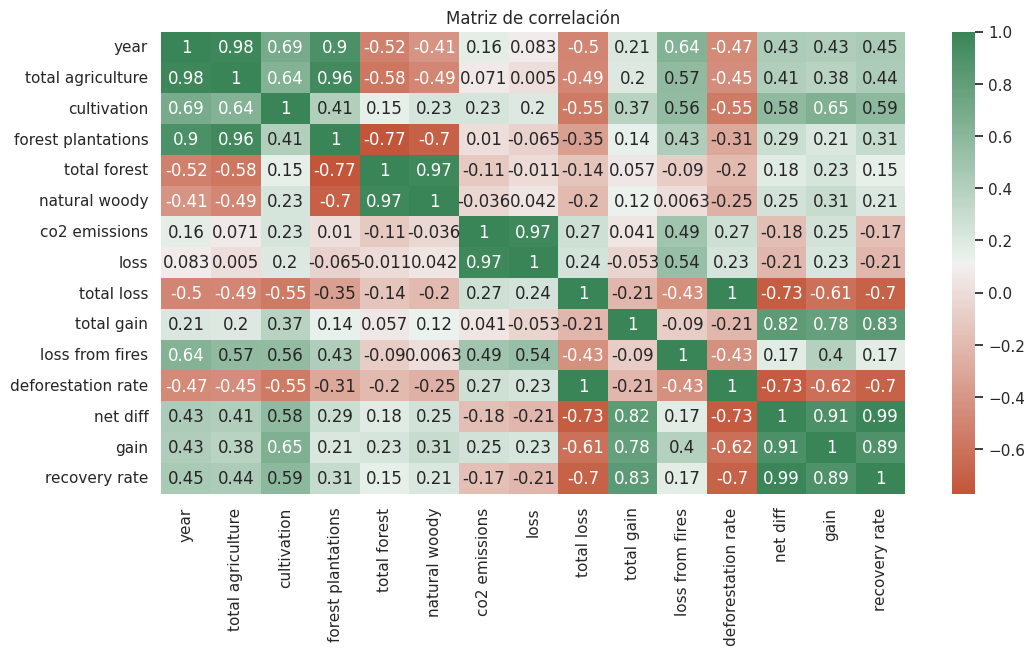

In [68]:
df["deforestation rate"] = df["total loss"] / df["natural woody"] * 100
df["net diff"] = df["natural woody"].diff()
df["gain"] = df["net diff"] + df["loss"]
df["recovery rate"] = df["gain"] / df["loss"] * 100

total_gain = df["total gain"].sum()
total_loss = df["total loss"].sum()
total_net_diff = df["net diff"].sum()
print(df[["total forest", "net diff", "gain", "year"]])
print("ganancia acumulada", total_gain)
print("perdida acumulada", total_loss)

print("perdida neta", total_loss - total_gain)
print("diferencia 2020-2000", df["total forest"][0] - df["total forest"][19])
# 2. Análisis de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=sns.diverging_palette(20, 140, as_cmap=True),
)
plt.title("Matriz de correlación")
plt.savefig("../data/charts/correlation_matrix.jpg", bbox_inches="tight")
plt.show()
plt.close()
df = pd.DataFrame(df)

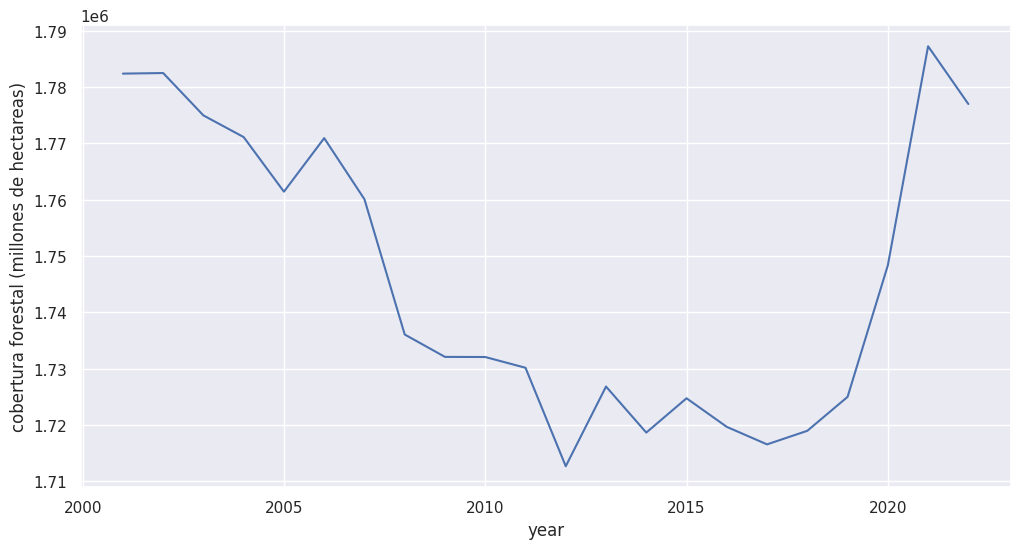

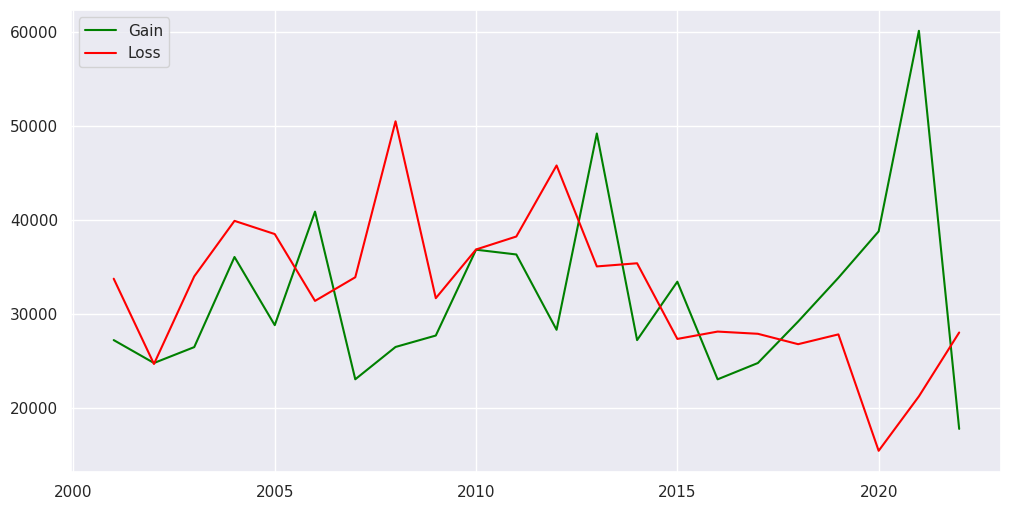

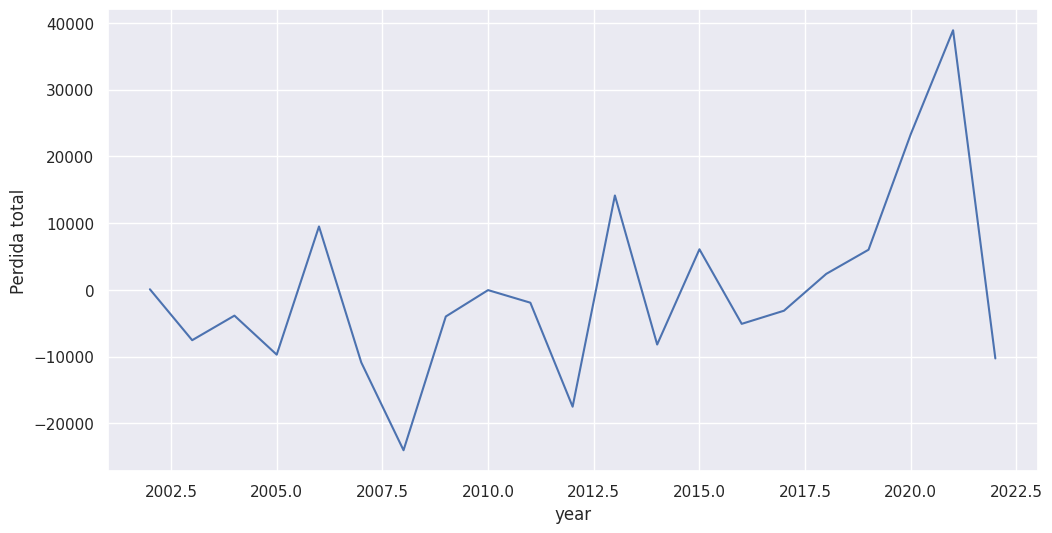

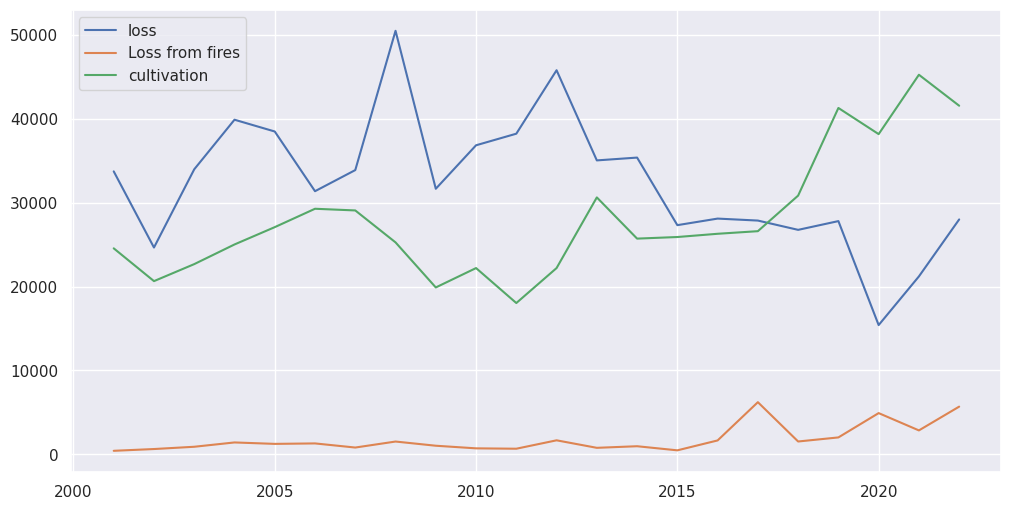

Años con cambios significativos: [2008.0, 2012.0, 2013.0, 2020.0, 2021.0]


In [69]:
# 1. Tendencias temporales
plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="natural woody")
plt.ylabel("cobertura forestal (millones de hectareas)")
# plt.savefig("../data/charts/linear--total_forest-year.jpg", bbox_inches='tight')
plt.show()
# plt.close()


plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["total gain"], label="Gain", color="Green")
plt.plot(df["year"], df["total loss"], label="Loss", color="Red")
plt.legend()
plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="net diff")
plt.ylabel("Perdida total")
# plt.savefig("../data/charts/linear--total_forest-year.jpg", bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["total loss"], label="loss")
plt.plot(df["year"], df["loss from fires"], label="Loss from fires")
plt.plot(df["year"], df["cultivation"], label="cultivation")
plt.legend()
plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

# print(df.describe())


puntos_inflexion = df[abs(df["net diff"]) > df["net diff"].std()]
print("Años con cambios significativos:", puntos_inflexion["year"].tolist())

En este punto queremos construir un modelo que nos prediga la perdida y ganancia en anios siguientes o en una porcion, para esto nos preguntamos cuales son los parametros mas importantes 

In [46]:
import numpy as np
import pandas as pd

files_with_6_features = ["BERNARDO DE IRIGOYEN AERO.txt", "OBERA.txt"]
files_with_9_features = ["IGUAZU AERO.txt", "POSADAS AERO.txt"]

file_names = [*files_with_9_features, *files_with_6_features]

result = np.zeros([9, 23, 4, 32, 13], dtype="object")

index_mapping = {
    0: 0,  # Precipitaciones (mm) -> 0
    1: 1,  # Temperatura Máxima (°C) -> 1
    2: 2,  # Temperatura Mínima (°C) -> 2
    3: 4,  # Viento Máximo (km/h) -> 4
    4: 6,  # Humedad Relativa Máxima (%) -> 6
    5: 7,  # Humedad Relativa Mínima (%) -> 7
}

for file_index, file_name in enumerate(file_names):
    # start lecture in lines of the file
    file = open(
        f"../raw_data/metereological center/{file_name}", encoding="latin-1"
    )
    content = file.readlines()[5:]

    row_index = 0
    end = len(content)

    year = 0
    parameter_index = -1

    while row_index < end:
        # Get header
        while row_index < end and not content[row_index].startswith("Dia"):
            row_index += 1
        if row_index >= end:
            break

        # Start processing dataframe
        parameter_df = []
        for day in range(32):
            parameter_df.append(content[row_index + day].split(";")[:-1])
        row_index += 32
        # Check for parameter divergence
        if year == 0:
            parameter_index += 1

        # print(parameter_index, file_index, year)
        if file_name in files_with_6_features:
            result[index_mapping[parameter_index], year, file_index] = np.array(
                parameter_df
            )
        else:
            result[parameter_index, year, file_index] = np.array(parameter_df)
        year = (year + 1) % 23
    file.close()

precipitations = result[0]
max_temperature = result[1]
min_temperature = result[2]
avg_temperature = result[3]
max_wind = result[4]
avg_scalar_wind = result[5]
max_humidity = result[6]
min_humidity = result[7]
avg_humidity = result[8]

In [47]:
import numpy as np
import pandas as pd

precipitation_totals = []
combined_precipitation_dfs = []

for year_data in precipitations:
    combined_df = pd.DataFrame()
    valid_counts = pd.DataFrame()

    for file_data in year_data:
        aux_df = pd.DataFrame(columns=file_data[0], data=file_data[1:])
        aux_df = aux_df.replace({",": ".", "<0.1": "0.05"}, regex=True)
        aux_df.replace("S/P", np.nan, inplace=True)
        aux_df = aux_df.apply(pd.to_numeric, errors="coerce")

        if valid_counts.empty:
            valid_counts = aux_df.notna().astype(int)
            combined_df = aux_df.copy()
        else:
            valid_counts += aux_df.notna().astype(int)
            combined_df = combined_df.add(aux_df, fill_value=0)

    # Calculate the average, ignoring NaN values
    combined_avg = combined_df.div(valid_counts)
    combined_avg = combined_avg.replace([np.inf, -np.inf], np.nan)
    combined_precipitation_dfs.append(combined_avg)

In [48]:
# Example usage:
combined_precipitations = []
for year_df in combined_precipitation_dfs:
    monthly_sums = year_df.iloc[:, 1:].sum(axis=0)
    yearly_sum = monthly_sums.sum()
    combined_precipitations.append(yearly_sum)
print(combined_precipitations)

[np.float64(2433.3791666666666), np.float64(2245.1499999999996), np.float64(2869.1375000000003), np.float64(2220.9416666666666), np.float64(1988.6333333333334), np.float64(2071.820833333333), np.float64(2332.7458333333334), np.float64(2620.6875), np.float64(1990.2416666666666), np.float64(2796.4249999999997), np.float64(2416.616666666667), np.float64(2155.033333333333), np.float64(2192.1124999999997), np.float64(2448.1458333333335), np.float64(3256.9416666666666), np.float64(3115.4791666666665), np.float64(2453.9791666666665), np.float64(2868.9125), np.float64(2506.7291666666665), np.float64(2261.7666666666664), np.float64(1843.0416666666665), np.float64(1800.0958333333333), np.float64(2586.808333333333)]


-0.42498169988802403
-0.3818160338766136


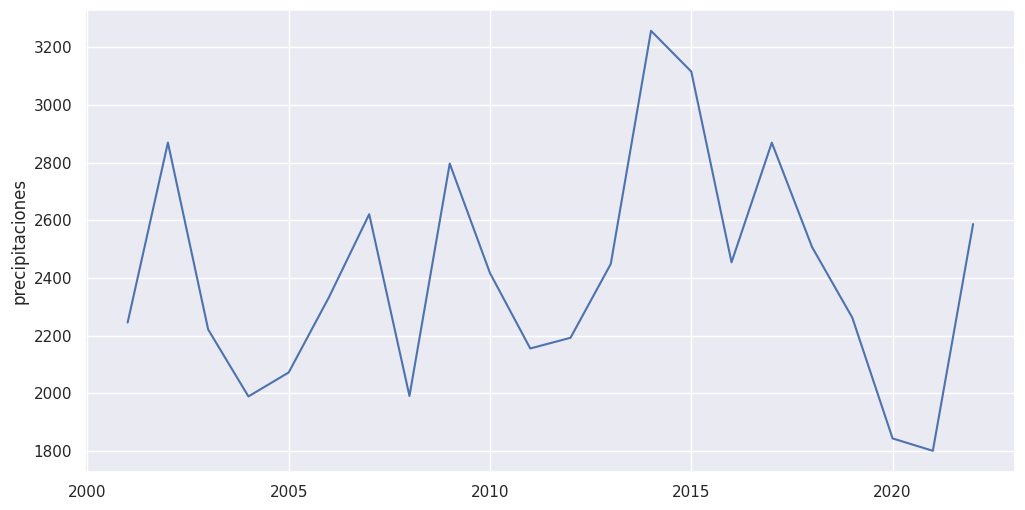

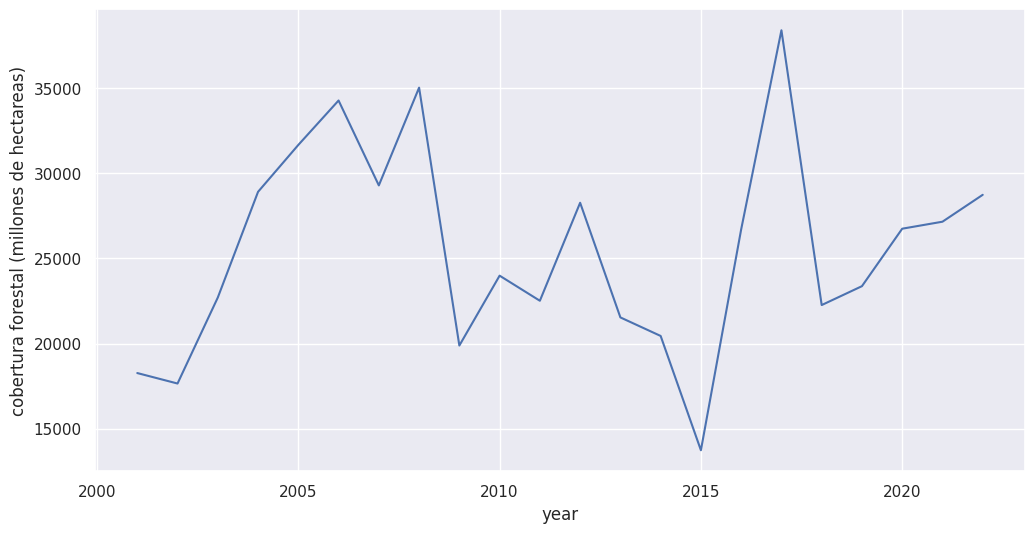

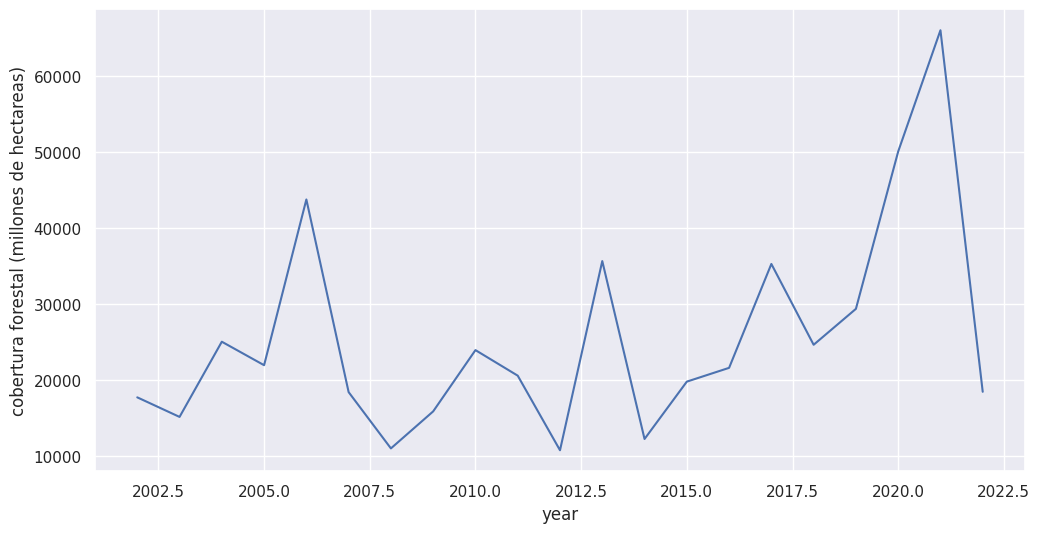

In [49]:
years = list(range(2000, 2020))
print(correlation_r(df["gain"], combined_precipitations[1:]))
print(correlation_r(df["loss"], combined_precipitations[1:]))

plt.figure(figsize=(12, 6))
plt.plot(df["year"], combined_precipitations[1:])
plt.ylabel("precipitaciones")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="loss")

plt.ylabel("cobertura forestal (millones de hectareas)")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="gain")
plt.ylabel("cobertura forestal (millones de hectareas)")
plt.show()

In [50]:
import numpy as np
import pandas as pd


def process_meteorological_data(data, dl, replace_dict=None, to_numeric=True):
    """Process meteorological data for multiple years and files.

    :param data: numpy array with shape [years, files, rows, columns]
    :param dl: logical dimention of the file array
    :param replace_dict: dictionary of values to replace (e.g., {"S/P": np.nan,
         "<0.1": "0.05"})
    :param to_numeric: boolean, whether to convert data to numeric
    :return: list of processed DataFrames, one for each year
    """
    processed_dfs = []

    for year_data in data:
        combined_df = pd.DataFrame()
        valid_counts = pd.DataFrame()

        for i in range(0, dl):
            file_data = year_data[i]
            aux_df = pd.DataFrame(columns=file_data[0], data=file_data[1:])

            if replace_dict:
                aux_df = aux_df.replace(replace_dict)

            aux_df = aux_df.replace({",": "."}, regex=True)

            if to_numeric:
                aux_df = aux_df.apply(pd.to_numeric, errors="coerce")

            if valid_counts.empty:
                valid_counts = aux_df.notna().astype(int)
                combined_df = aux_df.copy()
            else:
                valid_counts += aux_df.notna().astype(int)
                combined_df = combined_df.add(aux_df, fill_value=0)

        # Calculate the average, ignoring NaN values
        combined_avg = combined_df.div(valid_counts)
        combined_avg = combined_avg.replace([np.inf, -np.inf], np.nan)
        processed_dfs.append(combined_avg)

    return processed_dfs

In [51]:
def process_years(processed_dfs):
    yearly_sums = []
    for year_df in processed_dfs:
        monthly_sums = year_df.iloc[:, 1:].sum(axis=0)
        yearly_sum = monthly_sums.sum()
        yearly_sums.append(yearly_sum)
    return yearly_sums

In [52]:
# [['Dia' 'Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov'
#   'Dic']
#  ['1' 'S/P' 'S/P' 'S/P' 'S/P' '13,0' '35,0' 'S/P' 'S/P' '14,0' 'S/P'
#   'S/P' 'S/P']
#  ['2' '23,0' 'S/P' '3,0' 'S/P' '26,0' '0,1' 'S/P' 'S/P' '0,8' 'S/P' 'S/P'
#   '5,0']

In [53]:
replace_dict = {"S/P": np.nan, "<0.1": "0.05"}
precipitations_processed = process_meteorological_data(
    precipitations, dl=4, replace_dict=replace_dict
)
yearly_precipitations = process_years(precipitations_processed)

replace_dict = {"s/d": np.nan}
max_temperature_processed = process_meteorological_data(max_temperature, dl=4)
yearly_max_temperature = process_years(max_temperature_processed)

min_temperature_processed = process_meteorological_data(min_temperature, dl=4)
yearly_min_temperature = process_years(min_temperature_processed)

max_humidity_processed = process_meteorological_data(max_humidity, dl=4)
yearly_max_humidity = process_years(max_humidity_processed)

min_humidity_processed = process_meteorological_data(min_humidity, dl=4)
yearly_min_humidity = process_years(min_humidity_processed)

avg_temperature_processed = process_meteorological_data(avg_temperature, dl=2)
yearly_avg_temperature = process_years(avg_temperature_processed)

avg_scalar_wind_processed = process_meteorological_data(avg_scalar_wind, dl=2)
yearly_avg_scalar_wind = process_years(avg_scalar_wind_processed)

avg_humidity_processed = process_meteorological_data(avg_humidity, dl=2)
yearly_avg_humidity = process_years(avg_humidity_processed)


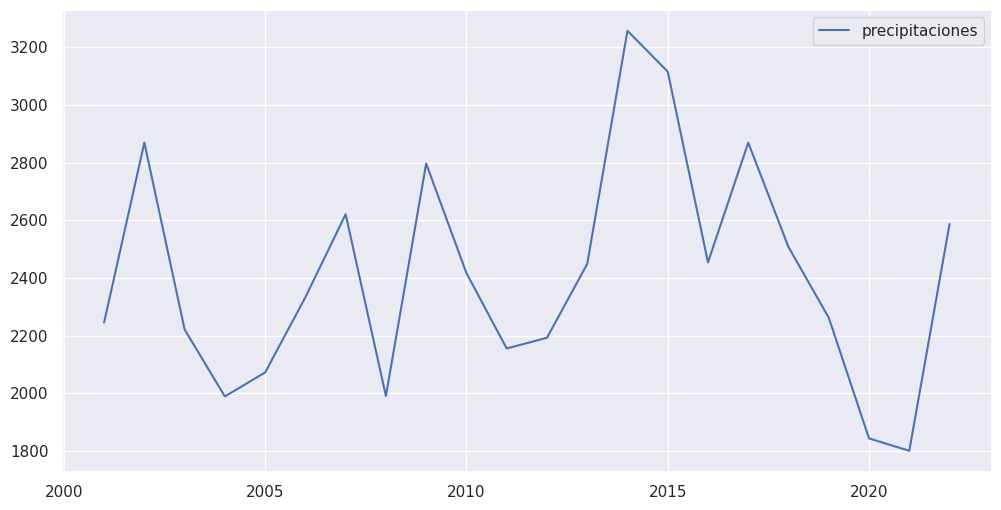

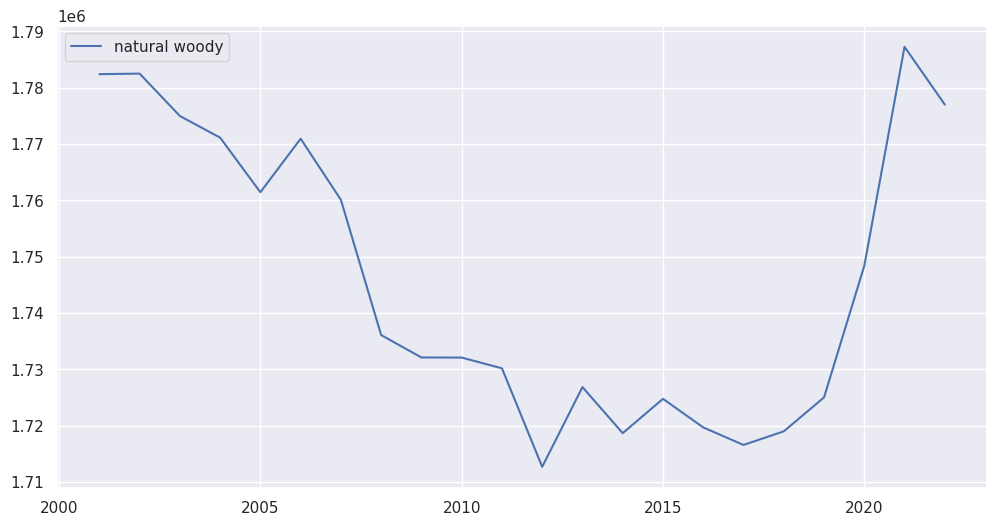

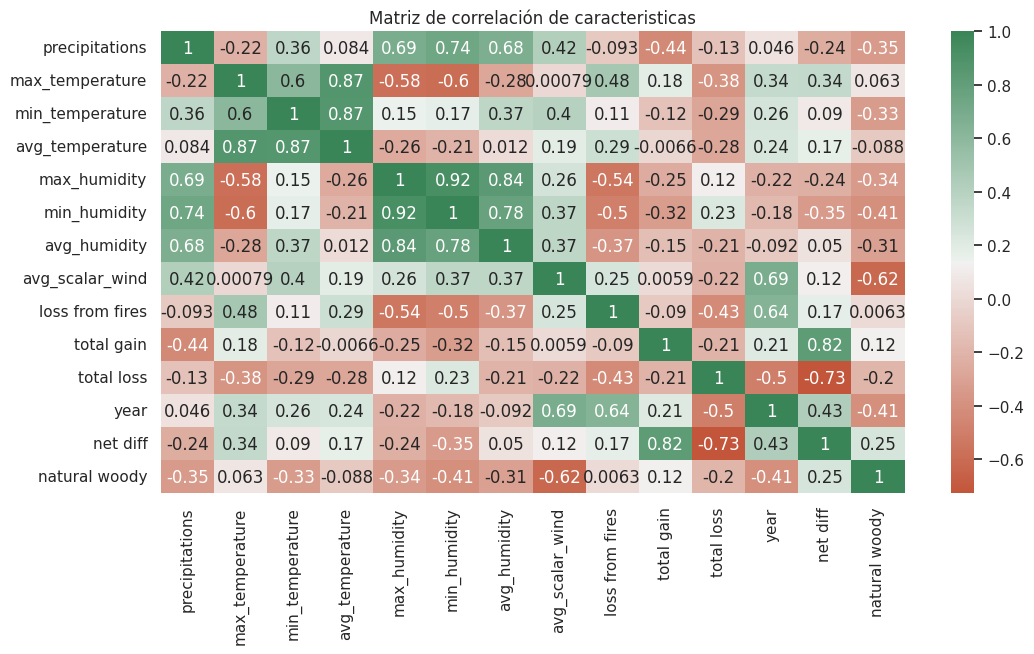

In [78]:
features = pd.DataFrame(
    data={
        "precipitations": yearly_precipitations,
        "max_temperature": yearly_max_temperature,
        "min_temperature": yearly_min_temperature,
        "avg_temperature": yearly_avg_temperature,
        "max_humidity": yearly_max_humidity,
        "min_humidity": yearly_min_humidity,
        "avg_humidity": yearly_avg_humidity,
        "avg_scalar_wind": yearly_avg_scalar_wind,
    }
)
# feature = pd.DataFrame(data=features)
features = features[1:].reset_index(drop=True)  # Eliminamos el año 2000
features = pd.concat(
    [
        features,
        df[
            [
                "loss from fires",
                "total gain",
                "total loss",
                # "gain",
                # "loss",
                "year",
                "net diff",
                "natural woody",
                # "total forest",
            ]
        ],
    ],
    axis=1,
)
corr_matrix = features.corr()


plt.figure(figsize=(12, 6))
plt.plot(features["year"], features["precipitations"], label="precipitaciones")
plt.legend()
# plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

plt.close()
plt.figure(figsize=(12, 6))
plt.plot(features["year"], features["natural woody"], label="natural woody")
plt.legend()
# plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix, annot=True, cmap=sns.diverging_palette(20, 140, as_cmap=True)
)
plt.title("Matriz de correlación de caracteristicas")
# plt.savefig("../data/charts/correlation_matrix.jpg", bbox_inches="tight")
plt.show()

# print(correlation_r(df["gain"], yearly_precipitations[1:]))
# print(correlation_r(df["loss"], yearly_precipitations[1:]), "\n")

# print("yearly_max_temperature")
# print(correlation_r(df["gain"], yearly_max_temperature[1:]))
# print(correlation_r(df["loss"], yearly_max_temperature[1:]), "\n")

# print("yearly_min_temperature")
# print(correlation_r(df["gain"], yearly_min_temperature[1:]))
# print(correlation_r(df["loss"], yearly_min_temperature[1:]), "\n")

# print("yearly_max_humidity")
# print(correlation_r(df["gain"], yearly_max_humidity[1:]))
# print(correlation_r(df["loss"], yearly_max_humidity[1:]), "\n")

# print("yearly_min_humidity")
# print(correlation_r(df["gain"], yearly_min_humidity[1:]))
# print(correlation_r(df["loss"], yearly_min_humidity[1:]), "\n")

# print("yearly_min_humidity")
# print(correlation_r(df["gain"], yearly_min_humidity[1:]))
# print(correlation_r(df["loss"], yearly_min_humidity[1:]), "\n")

# print("yearly_avg_scalar_wind")
# print(correlation_r(df["gain"], yearly_avg_scalar_wind[1:]))
# print(correlation_r(df["loss"], yearly_avg_scalar_wind[1:]), "\n")

# print("yearly_avg_humidity")
# print(correlation_r(df["gain"], yearly_avg_humidity[1:]))
# print(correlation_r(df["loss"], yearly_avg_humidity[1:]), "\n")

Probamos unicamente con la zona de iguazu

In [55]:
iguazu_loss = pd.read_csv(
    "../raw_data/gfw/iguazu_treecover_loss__ha.csv", sep=","
)
iguazu_loss.rename(
    columns={
        "umd_tree_cover_loss__year": "year",
        "umd_tree_cover_loss__ha": "loss",
        "gfw_gross_emissions_co2e_all_gases__Mg": "co2_emissions",
    },
    inplace=True,
)
iguazu_loss = iguazu_loss[["year", "loss", "co2_emissions"]]

# ///////////////////////////////

iguazu_data = np.zeros([9, 23, 32, 13], dtype="object")
with open(
    "../raw_data/metereological center/IGUAZU AERO.txt", encoding="latin-1"
) as iguazu_file:
    content = iguazu_file.readlines()[5:]

    row_index = 0
    end = len(content)

    year = 0
    parameter_index = -1

    while row_index < end:
        # Get header
        while row_index < end and not content[row_index].startswith("Dia"):
            row_index += 1
        if row_index >= end:
            break
        # Start processing dataframe
        parameter_df = []
        for day in range(32):
            parameter_df.append(content[row_index + day].split(";")[:-1])
        row_index += 32
        # Check for parameter divergence
        if year == 0:
            parameter_index += 1
        iguazu_data[parameter_index, year] = np.array(parameter_df)
        year = (year + 1) % 23


In [56]:
import numpy as np
import pandas as pd

iguazu_precipitations = iguazu_data[0]
iguazu_precipitations_processed = []
for year_data in iguazu_precipitations:
    res = pd.DataFrame(columns=year_data[0], data=year_data[1:])
    res = res.replace({"S/P": np.nan, "<0.1": "0.05"})
    res = res.replace({",": "."}, regex=True)
    res = res.apply(pd.to_numeric, errors="coerce")
    iguazu_precipitations_processed.append(res)

iguazu_yearly_precipitations = process_years(iguazu_precipitations_processed)
print(iguazu_yearly_precipitations[0])
# print(correlation_r(iguazu_yearly_precipitations[1:], iguazu_loss["loss"][:-1]))
print(
    sum(
        [
            206.0,
            120.0,
            56.0,
            166.0,
            199.5,
            208.8,
            82.2,
            103.0,
            170.5,
            250.5,
            110.0,
            233.0,
        ]
    )
)
print(correlation_r(iguazu_yearly_precipitations[1:], iguazu_loss["loss"][:-1]))

1905.85
1905.5
-0.047009715387366514
